Tutorial on how to use the PyCascades Python 
framework for simulating tipping cascades on complex networks.
The core of PyCascades consists of the basic classes for 
tipping elements, couplings between them and a 
tipping_network class that contains information about
the network structure between these basic elements as well as
an evolve class, which is able to simulate the dynamics of a
tipping network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pycascades as pc

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

Create two cusp tipping elements

In [2]:
cusp_element_0 = pc.cusp( a = -4, b = 1, c = 0.2, x_0 = 0.5 )
cusp_element_1 = pc.cusp( a = -4, b = 1, c = 0.0, x_0 = 0.5 )

Create a hopf tipping element.

In [3]:
hopf_element_1 = pc.hopf( a = 1, c = -1.0)

Create a linear coupling with strength 0.5

In [4]:
coupling_0 = pc.linear_coupling(strength = 0.5)

We first create a tipping network with two cusp elements.

In [5]:
net = pc.tipping_network()
net.add_element( cusp_element_0 )
net.add_element( cusp_element_1 )
net.add_coupling( 0, 1, coupling_0 )

Integrate the system.

In [6]:
initial_state = [0.0, 0.0]
ev = pc.evolve( net, initial_state )

timestep = 0.01
t_end = 30
ev.integrate( timestep , t_end )

time = ev.get_timeseries()[0]
cusp0 = ev.get_timeseries()[1][:,:].T[0]
cusp1 = ev.get_timeseries()[1][:,:].T[1]


We repeat the process, but with one cusp and one hopf element.

In [7]:
net2 = pc.tipping_network()
net2.add_element( cusp_element_0 )
net2.add_element( hopf_element_1 )
net2.add_coupling( 0, 1, coupling_0 )

initial_state = [0.0, 0.0]
ev = pc.evolve( net2, initial_state )

timestep = 0.01
t_end = 30
ev.integrate( timestep , t_end )

time2 = ev.get_timeseries()[0]
cusp2 = ev.get_timeseries()[1][:,:].T[0]
hopf = np.multiply(ev.get_timeseries()[1][:,:].T[1], np.cos(ev.get_timeseries()[0]))


We plot the results.

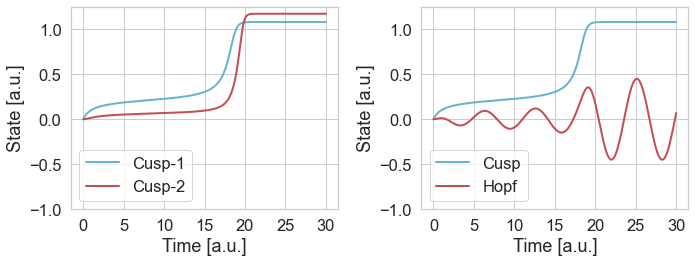

In [8]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4)) #(default: 8, 6)


ax0.plot(time, cusp0, color="c", linewidth=2.0, label="Cusp-1")
ax0.plot(time, cusp1, color="r", linewidth=2.0, label="Cusp-2")
ax0.set_xlabel("Time [a.u.]")
ax0.set_ylabel("State [a.u.]")
ax0.set_ylim([-1.0, 1.25])
ax0.set_xticks(np.arange(0, 35, 5))
ax0.set_yticks(np.arange(-1.0, 1.5, 0.5))
ax0.legend(loc="lower left")
#ax0.text(x_text, y_text, "$\\mathbf{c}$", fontsize=size)

ax1.plot(time2, cusp2, color="c", linewidth=2.0, label="Cusp")
ax1.plot(time2, hopf, color="r", linewidth=2.0, label="Hopf")
ax1.set_xlabel("Time [a.u.]")
ax1.set_ylabel("State [a.u.]")
ax1.set_ylim([-1.0, 1.25])
ax1.set_xticks(np.arange(0, 35, 5))
ax1.legend(loc="lower left")
#ax1.text(x_text, y_text, "$\\mathbf{d}$", fontsize=size)



fig.tight_layout()
plt.show()